In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from PIL import Image

<p style="font-size: 20px; color: seagreen; text-align: center"> Analyzing with pandas 

Python's pandas library provides a way to read and analyse data. In this document I will show some moves on the LEGO dataset. The set is divided into 8 parts - sets, inventory sets, parts, inventory parts, inventories, part categories, themes and colors. If you are familiar with my work, you know I love colors :)

The dataset includes a dataset schema, so let's start with it:

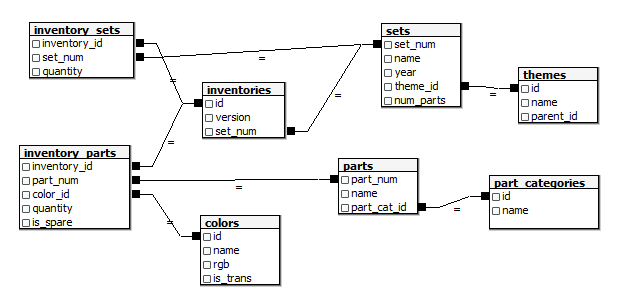

In [4]:
Image.open("dataset_schema.png")

Confusing, huh? Let's zoom more in:

In [5]:
df_inventory_sets = pd.read_csv("inventory_sets.csv")      # number dataframe

The inventory sets are numerical data, we have numbers to work with. First, I look closer at the dataset, then I make a variable name and wrap the data in it. The first variable name is "df_inventory_sets" (df is for dataframe). I will do the same for all eight parts.

In [6]:
df_inventories = pd.read_csv("inventories.csv")       # number dataframe

In [7]:
df_sets = pd.read_csv("sets.csv")      # text and number dataframe

In [8]:
df_themes = pd.read_csv("themes.csv")           # text dataframe

In [9]:
df_inventory_parts = pd.read_csv("inventory_parts.csv")         # number dataframe

In [10]:
df_colors = pd.read_csv("colors.csv")      # text dataframe

In [11]:
df_parts = pd.read_csv("parts.csv")        # text dataframe

In [12]:
df_part_categories = pd.read_csv("part_categories.csv")    # text dataframe

Now we know what a single dataset part looks like. We have numbers, we have text. The colors have a nice shape to start with:

In [13]:
df_colors.shape      # small and compact

(135, 4)

In [14]:
pd.set_option("display.max_rows", None)     # read all the colors
# df_colors     # to see the data, run in Jupyter Notebook

Always have clarity about the columns:

In [15]:
df_colors.columns

Index(['id', 'name', 'rgb', 'is_trans'], dtype='object')

You see, we work just with the variable name of the dataset and could find the $rgb$ code if we know the color name or vice versa:

In [16]:
df_colors[(df_colors["name"] == "Glow in Dark White")]

,id,name,rgb,is_trans
126,1000,Glow in Dark White,D9D9D9,f


In [17]:
df_colors[(df_colors["rgb"] == "D9D9D9")]

,id,name,rgb,is_trans
126,1000,Glow in Dark White,D9D9D9,f


We could read the whole dataset line by line (if needed) or wrap it in a variable and move through it. Next, we go through the sets.

In [18]:
pd.set_option("display.max_colwidth", None)         # shows whole name in the column
#df_sets         # to see the data, run in Jupyter Notebook

Making columns visible and clear:

In [19]:
df_sets.columns

Index(['set_num', 'name', 'year', 'theme_id', 'num_parts'], dtype='object')

Oh, let's find out the earliest year and the name of the set then:

In [20]:
df_sets.nsmallest(1, "year")                         # 1 is the number of rows we would like to show

,set_num,name,year,theme_id,num_parts
6935,700.1.1-1,Individual 2 x 4 Bricks,1950,371,10


And which year is the last for these data:

In [21]:
df_sets.nlargest(1, "year")

,set_num,name,year,theme_id,num_parts
236,10255-1,Assembly Square,2017,155,4009


We get all the parameters inside a row. I guess, you are interested in the number of parts? Me too :) Again, we could check the LEGO set with the most parts and the one with the least parts. We just change the column names:

In [22]:
df_sets.nlargest(1, "num_parts")

,set_num,name,year,theme_id,num_parts
170,10189-1,Taj Mahal,2008,276,5922


The set with the most LEGO parts is the $Taj$ $Mahal$. I've made some outside research and the 2008 Taj is the first edition. There is another LEGO Taj Mahal which was released in 2021 with less parts but as we already know, the last year in our dataset is 2017, so here is LEGO Taj Mahal with massive 5922 parts :)

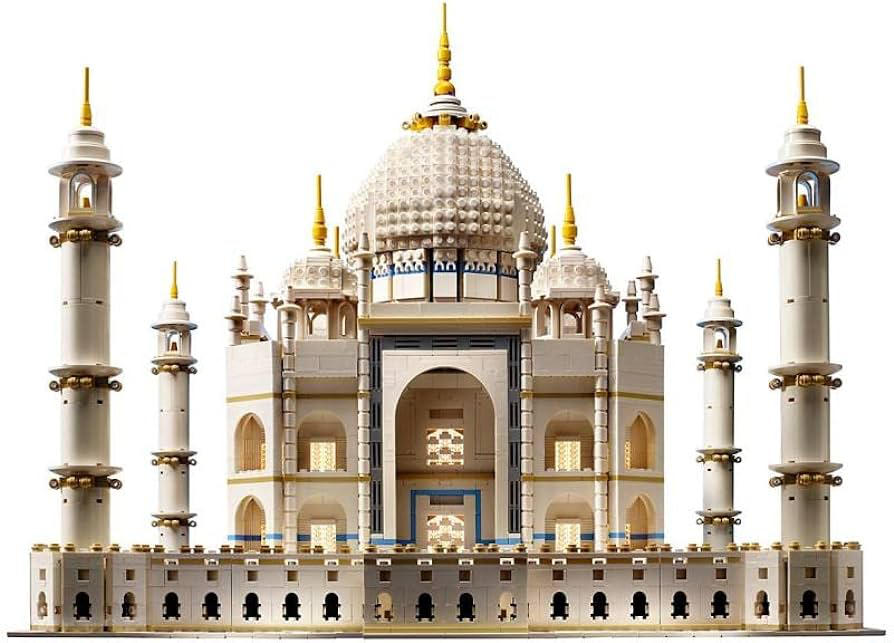

In [23]:
Image.open("lego_taj.JPG")

In [24]:
df_sets.nsmallest(1, "num_parts") 

,set_num,name,year,theme_id,num_parts
1683,240-1,"Wooden Storage Box Large, Empty",1967,383,-1


Above we see that the first row shows a storage box, so we add more rows one by one, until we get a real LEGO set. My research on the data shows that there are more than 1500 rows just up to 4 parts and most of them not really a LEGO set, they are lots of books, bands, minifigure and other advertisement stuff. So, going through data could mean changing paths here and then...

In [25]:
df_sets[(df_sets["num_parts"] == 0)].count()

set_num      473
name         473
year         473
theme_id     473
num_parts    473
dtype: int64

In [26]:
df_sets[(df_sets["num_parts"] == 1)].count()

set_num      285
name         285
year         285
theme_id     285
num_parts    285
dtype: int64

In [27]:
df_sets[(df_sets["num_parts"] == 3)].count()

set_num      278
name         278
year         278
theme_id     278
num_parts    278
dtype: int64

In [28]:
df_sets[(df_sets["num_parts"] == 5)].count()   # without .count() built-in function, we read

set_num      231
name         231
year         231
theme_id     231
num_parts    231
dtype: int64

We could choose, read and count sets through the number of parts, as shown above, or could extract concrete information:

In [29]:
df_sets[(df_sets["num_parts"] == 2000)]

,set_num,name,year,theme_id,num_parts
2691,3598-1,XXL 2000 Canister,2005,37,2000
3978,4425-1,Better Building More Fun,2004,37,2000
5242,5491-1,XXL 2000,2006,37,2000


In [30]:
df_sets[(df_sets["num_parts"] == 5000)]

,set_num,name,year,theme_id,num_parts


In [31]:
df_sets[(df_sets["num_parts"] > 5000)]

,set_num,name,year,theme_id,num_parts
161,10179-1,Millennium Falcon - UCS,2007,174,5195
170,10189-1,Taj Mahal,2008,276,5922
1337,2000409-1,Window Exploration Bag,2010,507,5200
11614,SWMP-1,Star Wars / M&M Mosaic - Promo Set,2005,169,5461


We have three sets with exact 2000 parts, no set with exact 5000 parts but four sets with more than 5000 parts. Below read visually the "num_parts" column:

In [32]:
num_sets_parts = df_sets["num_parts"]

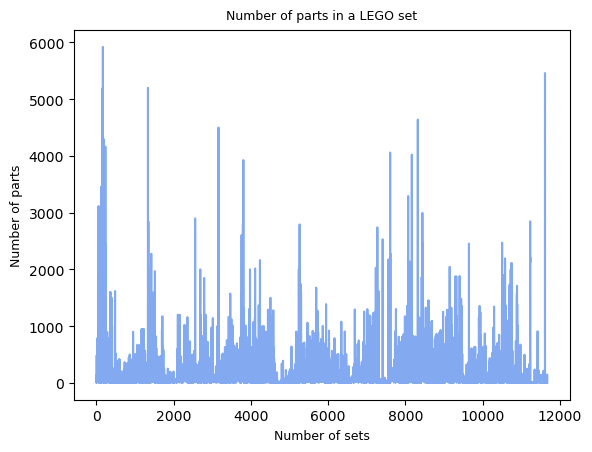

In [33]:
plt.plot(num_sets_parts, color = "cornflowerblue", alpha = 0.8)
plt.title("Number of parts in a LEGO set", fontsize = "9", pad = "8")
plt.xlabel("Number of sets", fontsize = "9")
plt.ylabel("Number of parts", fontsize = "9")
plt.show()

You remember, we had the largest set with nearly 6000 parts, 5922, the Taj Mahal? But let's go back to the colors:

In [34]:
df_colors.name.unique().shape

(135,)

In [35]:
df_colors.shape

(135, 4)

In [36]:
df_colors.name.unique()[73]       # color on this position

'Blue-Violet'

There are 135 unique colors in this LEGO dataset.

In [37]:
all_blue = [df_colors["name"].str.contains("Blue")]

In [38]:
df_blue = pd.DataFrame(all_blue).T

In [39]:
df_blue.loc[df_blue["name"] == True]

,name
2,True
10,True
23,True
32,True
37,True
39,True
47,True
56,True
69,True
73,True


In [40]:
df_colors.name[73]

'Blue-Violet'

In [41]:
df_colors.name[129]

'Glitter Trans-Light Blue'

There we are, found all the blue colors! We know the position, we display.

In [42]:
all_yellow = [df_colors["name"].str.contains("Yellow")]

In [43]:
df_yellow = pd.DataFrame(all_yellow).T

In [44]:
df_yellow.loc[df_yellow["name"] == True].shape

(8, 1)

This LEGO dataset contains 8 shades of yellow color. You see a part of the original dataframe:

In [45]:
df_yellow.loc[df_yellow["name"] == True]

,name
15,True
18,True
41,True
44,True
91,True
99,True
130,True
131,True


In [46]:
df_colors.name[[15, 91]]

15             Yellow
91    Yellowish Green
Name: name, dtype: object

In [47]:
all_pink = [df_colors["name"].str.contains("Pink")]

In [48]:
df_pink = pd.DataFrame(all_pink).T

In [49]:
df_pink.loc[df_pink["name"] == True]        # .shape shows the number of all pink colors

,name
6,True
14,True
28,True
40,True
49,True
60,True
74,True
100,True
116,True


In [50]:
df_colors.name[[40, 49, 74, 116]]          # shows more at ones

40             Trans-Dark Pink
49                 Chrome Pink
74     Glitter Trans-Dark Pink
116           Medium Dark Pink
Name: name, dtype: object

In [51]:
df_pink.loc[df_pink["name"] == True].shape

(9, 1)

There are 9 shades of pink colors in these LEGOs. The dataset is perfect for beginners! We work with small numbers and small dataframes.

Now, let us work with numberical data a little bit... scroll to the top of the notebook and choose a dataframe with numbers.

In [52]:
df_inventory_parts.shape       # too large data for the moment

(580251, 5)

In [53]:
df_inventories.shape

(11681, 3)

In [54]:
df_inventory_sets.shape          # okay, let's exercise with these numbers

(2846, 3)

In [55]:
df_inventory_sets.columns

Index(['inventory_id', 'set_num', 'quantity'], dtype='object')

In [56]:
df_inventory_sets[(df_inventory_sets["quantity"] == 1)].shape

(2793, 3)

In [57]:
df_inventory_sets[(df_inventory_sets["quantity"] == 2)].shape

(28, 3)

In [58]:
df_inventory_sets[(df_inventory_sets["quantity"] == 3)].shape

(5, 3)

In [59]:
df_inventory_sets[(df_inventory_sets["quantity"] == 5)].shape

(1, 3)

In [60]:
df_inventory_sets[(df_inventory_sets["quantity"] == 7)].shape

(1, 3)

In [61]:
df_inventory_sets[(df_inventory_sets["quantity"] == 20)].shape

(1, 3)

In [62]:
df_inventory_sets[(df_inventory_sets["quantity"] == 60)].shape

(17, 3)

I really start falling in love with data... First I sorted "more than", than I changed to "exactly" quantity. At the very, very beginning of everything, I always open the variable name and look detailed throughout the data...

From all 2846 inventory sets, there are:

In [63]:
df_qty = pd.DataFrame({"number of sets": [2793, 28, 5, 1, 1, 1, 17],
                           "quantity": [1, 2, 3, 5, 7, 20, 60]})

In [64]:
df_qty

,number of sets,quantity
0,2793,1
1,28,2
2,5,3
3,1,5
4,1,7
5,1,20
6,17,60


In [65]:
df_qty["number of sets"].sum()          # checking accuracy, number correct!

2846

And now going to discover $Why?$

> feeling happy, I will continue soon...

____________________________________________________________________________________________________________________________

Data source: https://www.kaggle.com/datasets/rtatman/lego-database